# PRACTICAL SESSION 2:
Simulating truncated homogeneous sphere gravitational collapse.

## MODULES IMPORT

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy import constants as const
from astropy import units as u

In [2]:
# Setting the random number generator

rng = np.random.default_rng()

# 1 - INPUT GENERATION:
Sampling N p.cles in an homegeneous sphere of mass M and radius R. Studied systems are the following:

    V01 - Sun with 100 p.cles and units of solar mass, solar radius and minutes.

In [36]:
file_in = 'IF_V01.txt'

In [3]:
# UNITS

# Chosen units (same name as in astropy https://docs.astropy.org/en/stable/units/#module-astropy.units.astrophys)

my_u = ["R_sun","min","M_sun"]

# Physical constants converted to chosen units

G = const.G.to(my_u[0] + "^3/(" + my_u[1] + "^2 " + my_u[2] + ")").value
c = const.c.to(my_u[0] + "/" + my_u[1]).value

# Normalization constants to go from physical units to internal units

R0 = 1 # solar radii
T0 = 1 # min
M0 = R0**3 / (G * T0**2)

In [4]:
# INITIAL CONDITIONS

N = 100 # number of p.cles
M = 1   # total mass (solar masses)
R = 1   # radius (solar radii)

# Masses
m = M / N * np.ones(N)

# Positions
phi = 2 * np.pi * rng.uniform(size=N)
the = np.arccos(1 - 2 * rng.uniform(size=N))
rho = R * rng.uniform(size=N)**(1/3)

x = rho * np.sin(the) * np.cos(phi)
y = rho * np.sin(the) * np.sin(phi)
z = rho * np.cos(the)

# Velocities
vx = np.zeros(N)
vy = np.zeros(N)
vz = np.zeros(N)

In [39]:
m = m / M0

x = x / R0
y = y / R0
z = z / R0

vx = vx / R0 * T0
vy = vy / R0 * T0
vz = vz / R0 * T0

time_in = 0 # initial time

output = np.column_stack((m, x, y, z, vx, vy, vz))
with open(file_in, 'w') as file:
    file.write(f'{N}\n')
    file.write(f'{time_in}\n')
    np.savetxt(file, output)

# 2 - DATA ANALYSIS:
The expected collapse time is $t_c = \sqrt{\frac{3\pi}{32G\rho}}$. For the Sun $t_c = 29.5$ min.

In [ ]:
# Output from 'IF_V01.txt' with integration step 0.05, print step 0.1, simulation time 40

file_out = 'OF_V01_2.txt'

In [11]:
# Reading file

n = N + 2 # 'block' length
m = 2     # number of rows to skip (i.e. lines containing n. bodies and time)

time_rows = []
data_rows = []
with open(file_out, "r") as file:
    lines = file.readlines()
    for i in range(0, len(lines), n):  # move through rows every n rows
        time_rows.extend(lines[i+1:i+m])
        data_rows.extend(lines[i+m:i+n])

time = np.loadtxt(time_rows)
data = np.loadtxt(data_rows)

In [12]:
# Fetching data

m = data[:, 0] # masses

r = data[:, 1:4] # positions
d = np.linalg.norm(r, axis=1) # distance from center

v = data[:, 4:7] # velocities

(40000,)

Text(0, 0.5, 'distance from center [R$_{\\odot}$]')

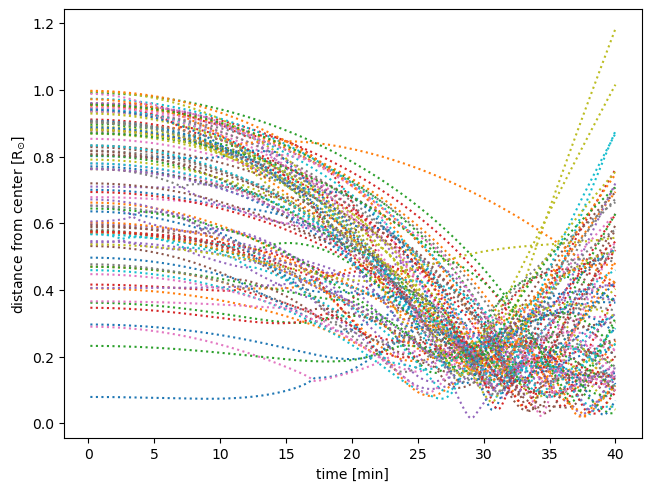

In [27]:
# Plotting distance vs time

fig, ax = plt.subplots(1, 1, layout='constrained')

for i in range(N):
    ax.plot(time, d[i::N], ':')

ax.set_xlabel('time [min]')
ax.set_ylabel('distance from center [R$_{\odot}$]')

## SOME COMPUTATIONS

In [ ]:
d_mtx = d.reshape((time.size, N)) # reshaping d in a matrix | d[:, i] contains the distance of the i p.cle at each instant

In [32]:
# COLLAPSE TIME

# Searching when each p.cle reach the minimum distance
index = np.argmin(d_mtx, axis=0) # finding the corresponding index
mask = (250 <= index) & (index <= 350)
time_min = np.array([time[i] for i in index[mask]]) # building a vector containing times of minimum

print('Mean t_{min} = ' + f'{time_min.mean() * T0}')
print('Minimal t_{min} = ' + f'{time_min.min() * T0}')
print('Maximal t_{min} = ' + f'{time_min.max() * T0}')

Mean t_{min} = 31.06070186849255
Minimal t_{min} = 25.60100321333309
Maximal t_{min} = 35.00343890272511
[299 258 303 359 373 280 306 306 337 307  88 344 294 326 313 342 172 338
 331 324 310 387 365 292 338 332 399 307 399 380 369 373 396 326 287 318
 305 280 303 271 290 329 283 313 288 394 399 301 286 342 306 281 399 310
 290 296 399 319 399 399 308 399 330 339 325 399 297 340 294 385 390 376
 367 383 348 334 305 310 305 255 302 297 393 305 380 345 343 399 209 311
 321 308 281 331 341 324 256 282 284 349]


In [15]:
index = np.argmax(d_mtx[-1])
print(d_mtx[0, index])

0.9289632382464242


In [16]:
index = np.argmax(d_mtx[0])
print(index, d_mtx[0, index], d_mtx[-1, index])

91 0.9973155299494537 0.7465706610224797


In [17]:
d_mtx.min(axis=0)

array([0.11519745, 0.08211262, 0.11992088, 0.04899428, 0.02324371,
       0.10617864, 0.11327843, 0.10532132, 0.07561294, 0.0788266 ,
       0.07339643, 0.13393052, 0.14423712, 0.12624351, 0.07712445,
       0.05447131, 0.12670762, 0.18413815, 0.13111894, 0.14626532,
       0.13759509, 0.13870739, 0.06212574, 0.17807478, 0.11645067,
       0.03875258, 0.14046851, 0.08706186, 0.0407179 , 0.02706586,
       0.11482597, 0.02012419, 0.02994051, 0.10481986, 0.16988443,
       0.22865082, 0.19302801, 0.29837374, 0.17376373, 0.09501659,
       0.17496617, 0.04903837, 0.15054696, 0.18523662, 0.21371425,
       0.0919397 , 0.09822476, 0.11473886, 0.22687053, 0.09476017,
       0.03946962, 0.26871539, 0.10382116, 0.04177148, 0.01505292,
       0.18405361, 0.14741151, 0.1857393 , 0.0986018 , 0.12178268,
       0.22297028, 0.41922566, 0.11568208, 0.08804923, 0.09832363,
       0.1969073 , 0.1123271 , 0.11992185, 0.17914337, 0.04720577,
       0.02488146, 0.02017548, 0.07979665, 0.02891045, 0.08462